#### Example. Random generated data

1. generate data

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

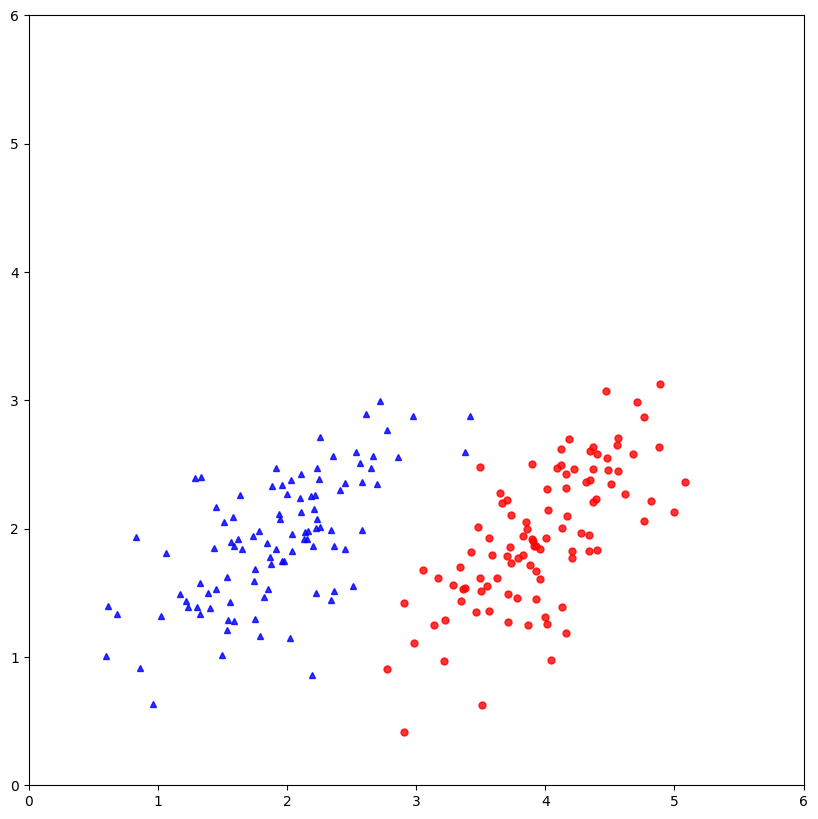

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

2. build model

In [3]:
#!pip install cvxopt
from cvxopt import matrix, solvers

Quadratic Programming

In [4]:
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [5]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859321018


3. visualize result

C:\Users\Admin\AppData\Local\Temp\ipykernel_3652\3498574399.py:2: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages('D:\\svm4hardmargin.pdf') as pdf:


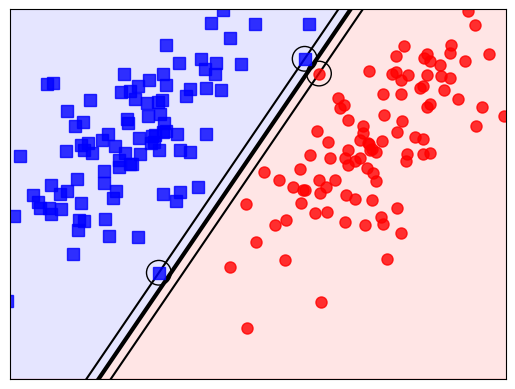

In [6]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('D:\\svm4hardmargin.pdf') as pdf:
  # draw
  # plot points
  fig, ax = plt.subplots()
  x1 = np.arange(-10, 10, 0.1)
  Y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
  Y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
  Y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
  plt.plot(x1, Y1, 'k', linewidth = 3)
  plt.plot(x1, Y2, 'k')
  plt.plot(x1, Y3, 'k')
  y4 = 10*x1
  plt.plot(x1, Y1, 'k')
  plt.fill_between(x1, Y1, color='red', alpha=0.1)
  plt.fill_between(x1, Y1, y4, color = 'blue', alpha = 0.1)
  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
  plt.axis('equal')
  plt.ylim(0, 3)
  plt.xlim(2, 4)
  # hide tikcs
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])
  # add circles around support vectors
  for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

SVM  sklearn

In [7]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


#### Exercise 1. Breast Cancer

##### 1. Read data

In [77]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [78]:
y = cancer_data.target
y[cancer_data.target == 0] = -1

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, y, test_size=0.3,random_state=109)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


##### 2. Classification

method 1. quadratic programming

In [80]:
from cvxopt import matrix, solvers

# build P ~ K
X0 = X_train[y_train == 1]
X1 = X_train[y_train == -1]
N = len(X_train)
V = np.concatenate((X0.T, -X1.T), axis = 1)

P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((N, 1))) # all-one vector

# build A, b, G, h
G = matrix(-np.eye(N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((N, 1)))
A = matrix(y_train.reshape((-1, N))) # the equality constrain is actually y^T lambda = 0
A = A * 1.0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[3.56089995e-176 1.24980218e-175 1.93923233e-176 1.61784321e-173
  3.00771794e-176 8.18302662e-175 1.65274665e+004 6.34457891e-176
  3.92173179e-176 2.69839567e-175 4.25940551e-176 5.16505691e-176
  5.51505131e-176 3.43407719e-176 3.72034455e-176 4.63632770e-176
  1.65866694e+002 2.72180536e-176 5.37271599e-176 3.58101659e-176
  9.54232649e-176 2.08152836e-176 4.13542899e+003 7.75213092e-176
  2.00970466e-176 6.59378040e-176 7.08861621e-176 2.94456426e-176
  4.06473512e-176 1.01181157e-175 3.79407884e-176 4.65329236e-176
  8.56236594e-176 3.96026687e-176 8.84644844e+004 2.89056692e-176
  2.92345642e-176 3.31836673e-176 3.16820351e-176 6.59730905e-176
  6.94845426e-176 2.82811428e-176 6.86749228e-176 1.65623752e-175
  8.08559069e-176 8.80714632e-176 3.54817083e-176 2.94355384e-176
  5.58674485e-176 2.46786614e-176 2.80707551e-176 5.96032214e-176
  2.88980594e-176 1.93475741e-175 1.39756844e-175 2.44348998e-176
  2.08006497e-174 5.37951877e-176 6.28855588e-176 4.82993172e-176


In [94]:
# compute coefficients
epsilon = 1e-5
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X_train.T[:, S]
yS = y_train[S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[ 2.04803509e+01 -9.89367070e-01 -1.87123830e+00 -2.81760618e-02
  -1.55737690e+02  8.87791005e+01 -3.33023883e+01 -1.58515451e+02
   2.01325885e+02 -2.16477957e+02 -1.89074655e+01  4.66128490e+00
  -7.57110843e+00  4.24399585e-02  9.38252656e+01 -3.69208238e+02
   4.00605557e+02 -2.19625774e+02  1.85128470e+02 -1.86567763e+01
   2.31400020e-02 -6.09657897e-01  7.91790183e-01 -1.13547400e-01
   9.77405245e+00  1.00007750e+02 -7.71757724e+01 -1.70127871e+02
  -1.47767933e+02  7.94037229e+01]]
W0 =  44.78540092927298


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# predict on test set
y_pred = np.sign(w.T.dot(X_test.T) + w0)

# accuracy
print(accuracy_score(y_test, y_pred[0]))
print(precision_score(y_test, y_pred[0]))
print(recall_score(y_test, y_pred[0]))
print(confusion_matrix(y_test, y_pred[0]))

0.8538011695906432
0.8120300751879699
1.0
[[ 38  25]
 [  0 108]]


method 2. sklearn

In [85]:
clf = SVC(kernel = 'linear', C = 1e5) # choose a big number for Hard Margin
clf.fit(X_train, y_train)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('w0 = ', w0)

w =  [[ 1.55841303e+04  5.69829895e+03  6.01236573e+02 -2.11652062e+02
  -7.58418989e+03 -3.58287335e+03 -2.28082132e+04 -1.67774049e+04
  -2.14646639e+04  2.35627498e+02 -4.23531681e+03  3.41852567e+04
  -7.07060988e+02 -1.82451703e+03 -1.29485985e+03  5.13476398e+03
  -1.07869294e+03 -3.52075548e+03 -5.84510533e+03  3.23810407e+02
   1.32407387e+03 -8.43438202e+03 -6.60376556e+02 -6.59702879e+00
  -1.27800564e+04  1.10353669e+04 -4.11879410e+04 -3.48086330e+04
  -6.38834076e+04  8.62849567e+02]]
w0 =  [88059.70921289]


In [86]:
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9649122807017544
0.9811320754716981
0.9629629629629629
[[ 61   2]
 [  4 104]]


#### Exercise 2. Sonar Signals

1. read data

In [65]:
# read data from file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/python/pyforml/week06_perceptron/sonar.all-data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

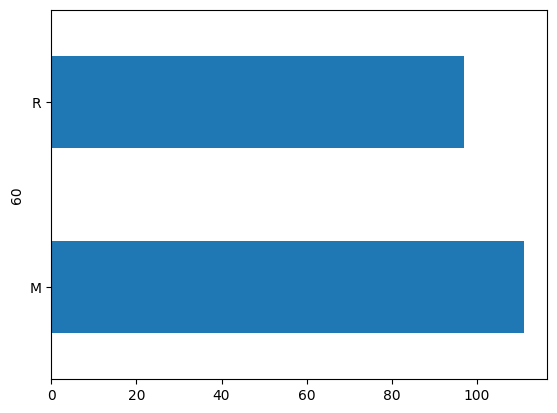

In [66]:
# check the data balance
df[60].value_counts().plot(kind='barh')

In [67]:
# convert output from string {'M', 'R'} into  {1, -1}
y_df = df[60]
targets_label = {'M': 1.0, 'R': -1.0}
targets_df = np.array([targets_label[item] for item in y_df])
print(targets_df.shape)

(208,)


In [68]:
# prepare data
X = df.drop(60, axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


2. split data into training and test set

In [69]:
# split data into training-test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targets_df, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(145, 60)
(63, 60)
(145,)
(63,)


3. classification

sklearn library

In [70]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # choose a big number for Hard Margin
clf.fit(X_train, y_train)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('w0 = ', w0)

w =  [[  31.89754055    2.7361879   -40.75425645   59.56788884   -0.54327221
     7.6844358   -21.68821193   -1.07301267    2.47344321   -3.74862706
    21.95664911   -1.95427997    2.57034418   -7.10809207    7.31991091
    -9.1174485   -16.19492166   21.89632499   -8.03185046   15.24174748
   -24.42869294   29.36135208  -22.32403141   22.5647415     5.91406336
   -12.02642132    5.3263515     3.53603594   -5.55709203   19.03161996
   -32.31853632   14.49559639    9.59438376  -11.64776404    9.80679336
   -21.71722084    2.61985629    2.50517755   13.35290303   -8.79188976
   -11.23261493   -2.87798586   12.47429353   -0.42964041   -1.74165175
    25.19522746  -22.72624858   62.34151781   36.48837963 -116.75830027
    22.32840217   41.56990441   15.56135944   39.97144954   -8.83943894
   -23.04750058  -42.59071062   42.91690338   73.01467693   11.8432131 ]]
w0 =  [-17.84705946]


In [71]:
# predict on test set
pred = clf.predict(X_test)
pred

array([ 1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.])

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.746031746031746
0.7714285714285715
0.7714285714285715
[[20  8]
 [ 8 27]]


self built model

In [73]:
# build P ~ K
X0 = X_train[y_train == 1]
X1 = X_train[y_train == -1]
N = len(X_train)
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(N)) # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((N, 1)))
A = matrix(y_train.reshape((-1, N))) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[1.52025994e-08 3.21619403e-07 3.61961305e+03 2.32167383e+03
  4.45191492e-08 3.72616262e-08 8.15938874e+02 3.69703715e+02
  6.46538249e-08 7.96961685e-08 4.41351674e-06 2.66762490e-08
  1.90375016e-07 1.95329088e-08 3.57244668e+01 1.62360906e-07
  2.47457195e-08 9.74939462e+02 3.43511339e-08 6.59364699e+02
  1.17389402e-07 3.06320415e-08 2.68787453e-07 7.76599441e+02
  3.82953426e-08 4.46377200e-08 1.30400564e+03 5.14840384e-08
  4.47854864e-08 2.61506022e-08 4.84637367e-08 2.71825157e-08
  2.71346915e+03 8.73129742e-08 2.12492813e-08 4.42295352e+02
  4.84694899e-08 4.54662965e+03 4.31403563e-08 6.47856969e-08
  7.55581914e-08 2.81249307e-08 2.29155862e-08 3.23848455e-08
  1.07316267e-07 2.94821472e+03 1.67874738e-07 2.85027560e-08
  6.56877739e+02 7.14029670e-08 1.70604236e-07 2.67006408e-08
  1.09544873e-07 5.67645122e-08 9.12304573e-07 4.26268394e+03
  1.81729477e-08 5.70570705e-08 1.85149470e-07 1.26247279e+03
  2.85834119e-08 3.02409260e-08 4.04064769e-07 2.55045141e-0

In [74]:
epsilon = 1e-5 # just a small number, greater than 1e-5, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = np.array(X_train)[S, :]
yS = np.array(y_train)[S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS.T))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[  35.87398197  -12.23412298  -55.88009975   45.20859639   11.10162987
    19.41597782  -46.18319207   -8.58616318   22.69495331  -20.15698004
    24.05227719    3.84767491    5.38591753  -17.48724656   16.10485068
   -11.28621989  -14.41463198   13.88050115   -4.7022561    15.7493271
   -26.77338227   22.8415474    -9.98230151    8.47295414    3.40587052
    -9.94747104   -2.26013967    8.99334642  -12.79480618   25.57196237
   -33.33518984    6.00207511   11.85508044  -17.16727235   12.13367907
   -16.61147396   -5.64688285    8.96499314   -2.23590259    7.93429468
   -12.63924532   -2.47491048    8.6834764     8.21349647  -20.70320458
    41.50991244  -27.35851472   48.8827867    52.74530428 -134.28065978
    -6.35461667   49.16279322   17.59844883   45.1577162   -19.65802679
   -21.70035394  -47.40378483   36.52626284   88.80151087   12.13445755]]
W0 =  0.07694858037656659


In [75]:
# predict
y_pred = np.sign(w.T.dot(X_test.T) + w0)

# accuracy
print(accuracy_score(y_test, y_pred[0]))
print(precision_score(y_test, y_pred[0]))
print(recall_score(y_test, y_pred[0]))
print(confusion_matrix(y_test, y_pred[0]))

0.7777777777777778
0.8
0.8
[[21  7]
 [ 7 28]]
